# FUNCIONES DE COMPILACION EN PYTHON

## ¿Que es una funcion?

Una función es un bloque de código con un nombre asociado, que recibe cero o más argumentos como entrada, sigue una secuencia de sentencias, la cuales ejecuta una operación deseada y devuelve un valor y/o realiza una tarea especifica.

    Ventajas:
 -  modularización
 -  reutilización


<img width=500px src='https://i.blogs.es/e0bc04/function-io/1366_2000.png'> <img width=500px src='https://upload.wikimedia.org/wikipedia/commons/3/32/Function_machine5.png'>

Python dispone de una serie de funciones integradas al lenguaje, y también permite crear funciones definidas por el usuario para ser usadas en su propios programas.

La definición de funciones se realiza mediante la instrucción *def* más un nombre de función descriptivo donde se aplican las mismas reglas que para el nombre de las variables. Como toda funcion en python, la definición de la función finaliza con dos puntos (:)


In [1]:
def mi_funcion():
    #aqui el algortimo
    pass

La declaración *pass* no realiza ninguna acción, pero evita que se genere un error de indentación al crear una función vacía.

In [2]:
def mi_funcion():
    print("Hola mundo")

In [3]:
mi_funcion()

Hola mundo


In [4]:
type(mi_funcion)

function

Asi mismo, se utilizan las funciones para efectuar todo tipo de acciones segun sea necesario, en este caso se utiliza la expresión *return* para regresar un objeto específico a su ámbito superior y acto seguido dar por terminada la ejecución de la función de forma similar a break. Pueden incluirse varias expresiones return en una función, pero sólo se ejecutará la primera que se encuentre.

In [5]:
def multiplicar(x,y):
    return(x * y)

In [6]:
multiplicar(2,5)

10

Tipos de datos mas utilizados:
- Entero (int)= 1 2 3
- Flotante (float)= 1.1 4.3
- Booleano (bool)= true false
- Palabra (String)= hola

## Keras o Tensorflow?

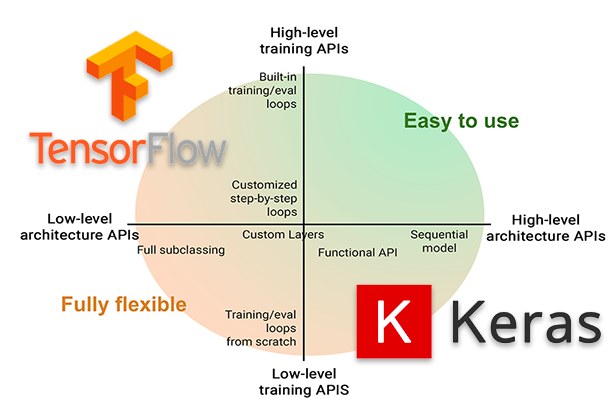

Keras es una capa de abstracción que crea un modelo gráfico subyacente. TensorFlow es el motor que hace todo el trabajo pesado y "ejecuta" el modelo.

Por supuesto, puede usar TensorFlow sin Keras, esencialmente construyendo el modelo "a mano", pero no se puede usar Keras sin un motor subyacente. Por lo general, es TensorFlow es el mas utilizado como motor, pero Keras también es compatible con CNTK y Theano, paea ensamblar y ejecutar un modelo gráfico.

En resumen, Keras es un nivel de abstracción por encima de Tensorflow. Cuando se llama a un comando Keras, llama a los comandos apropiados de Tensorflow para construir un gráfico, y Tensorflow realiza todos los cálculos y la capacitación subyacentes.

## Funciones para entrenamiento de redes neuronales en Python

Tenemos un modelo general para crear un modelo de red neuronal y queremos empezar a construir una red neuronal como la siguiente:

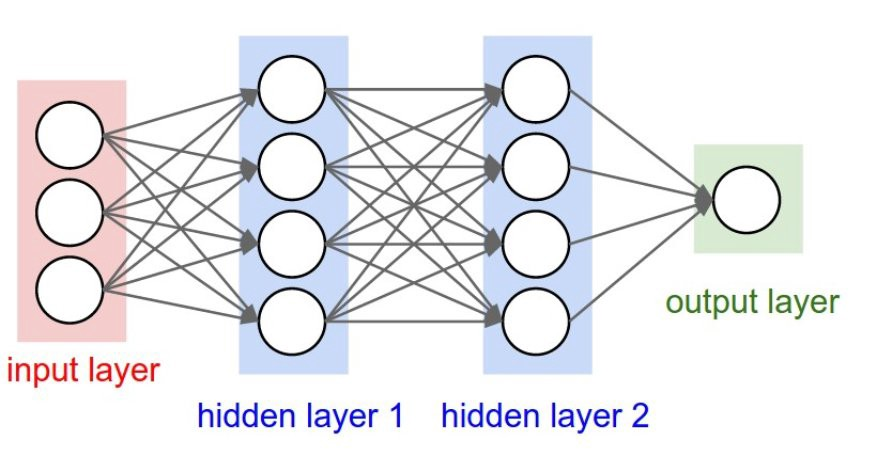

Al trabajar con redes neuronales, vamos a encontrar scripts de este tipo:

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

o simplificados de este manera:

In [8]:
model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))

Deifniremos como vamos a especificar el modelo de una red neuronal.

#### Clase Sequential en Keras

La estructura de datos principal en Keras es la clase *Sequential*, que permite la creación de una red neuronal básica. Keras ofrece también una API que permite implementar modelos más complejos en forma de grafo que pueden tener múltiples entradas, múltiples salidas, con conexiones arbitrarias en medio.

La clase *Sequential* de la librería de Keras es una envoltura para el modelo de red neuronal secuencial que ofrece Keras y se puede crear  de la siguiente manera:

In [9]:
from keras.models import Sequential
model = Sequential()

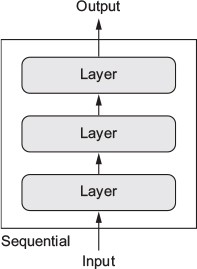

El modelo en Keras se considera como una secuencia de capas que cada una de ellas va “destilando” gradualmente los datos de entrada para obtener la salida deseada. En Keras podemos encontrar todos los tipos de capas requeridas y se pueden agregar fácilmente al modelo mediante el método *add( )*.

### Pasos para implementar una red neuronal en Keras

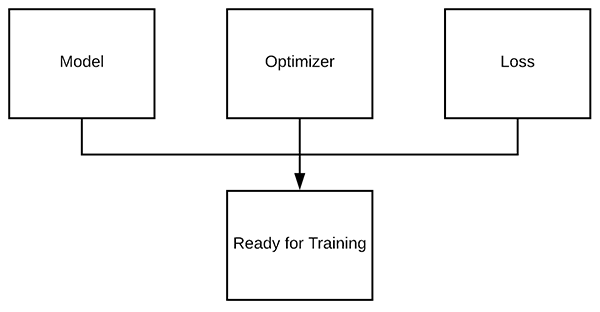

#### Especificar el tamaño de entrada

El modelo necesita saber qué forma de entrada debe esperar. Por esta razón, la primera capa en un modelo *sequential* necesita recibir información sobre su forma de entrada.

In [10]:
model = Sequential()
model.add(Dense(10, input_shape=(784,)))

# Tambien se escribe como

model = Sequential()
model.add(Dense(10, input_dim=784))

Se pasa un argumento *input_shape* a la primera capa. 

Para un argumento input_shape donde se espera un entero positivo o ninguno se conoce como tupla, la dimensión del lote no está incluida.

El parametro *Dense* admite la especificación de su forma de entrada a través del argumento *input_dim* para capas 2D, y algunas capas temporales 3D admiten los argumentos *input_dim* y *input_length*.

Si se necesita especificar un tamaño de lote fijo para sus entradas, se puede pasar un argumento de tamaño de lote a una capa. Se pasa tanto *batch_size = 32* como *input_shape = (28, 28)* a una capa, se espera que cada lote de entradas tenga la forma de lote (32, 28, 28).

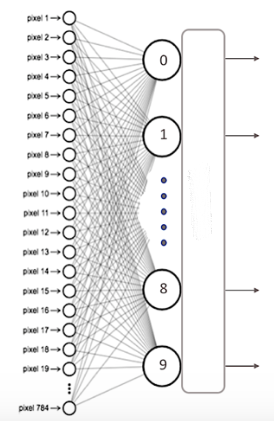

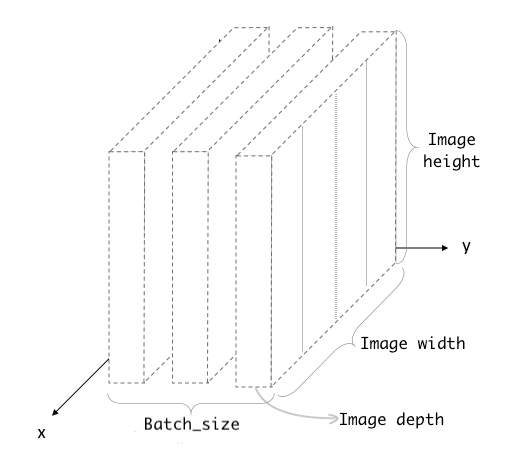

El *batch_size* define el número de muestras que se propagarán a través de la red.

Por ejemplo, supongamos que tiene 1050 muestras de entrenamiento y desea configurar un *batch_size* igual a 100. El algoritmo toma las primeras 100 muestras (del 1 al 100) del conjunto de datos de entrenamiento y entrena la red. Luego, toma las siguientes y entrena la red nuevamente. 

Ventajas:

- Requiere menos memoria. Se entrena la red con menos muestras.
- Las redes entrenan más rápido con mini lotes. Eso es porque se actualizan los pesos después de cada propagación. 

Desventajas:

- Cuanto más pequeño sea el lote, menos precisa será la estimación del gradiente. 

### Configuración del proceso de aprendizaje

A partir del modelo *Sequential*, se definen las capas con el método add(). Una vez que definido el modelo, se configura su proceso de aprendizaje con el método *compile()*, con el que se puede especificar algunas propiedades a través de argumentos del método.

*compile(optimizer, loss=None, metrics=None)*


**Argumentos**

Principales
- **optimizador:** String (nombre del optimizador). 
- **fundion de pérdida:** String (nombre de la función de perdida). Si el modelo tiene múltiples salidas, se puede usar una funcion de pérdida diferente en cada salida y el valor de pérdida que será la suma de todas las pérdidas individuales.
- **métricas:** lista de métricas que el modelo evaluará durante el entrenamiento y las pruebas. Se usan para monitorizar el proceso de aprendizaje (y prueba) de la red neuronal. 


In [11]:
# For a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# For a binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# For a mean squared error regression problem
model.compile(optimizer='rmsprop',
              loss='mse')

# For custom metrics
import keras.backend as K

def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy', mean_pred])

### Optimizadores

Keras dispone de diferentes optimizadores que pueden usarse: SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam.  

In [12]:
# pass optimizer by name: default parameters will be used
model.compile(loss='mean_squared_error', optimizer='sgd')

In [13]:
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

El usuario puede definir manulmente los parametros del optimizador donde:

**lr (learning rate):** float >= 0. Los algoritmos de gradient descent multiplican la magnitud del gradiente por un escalar conocido como learning rate. El valor de este hiperparámetro depende del problema, pero se recomienda que sea un valor pequeño para evitar que el gradiente rebote sin llegar nunca al valor mínimo.
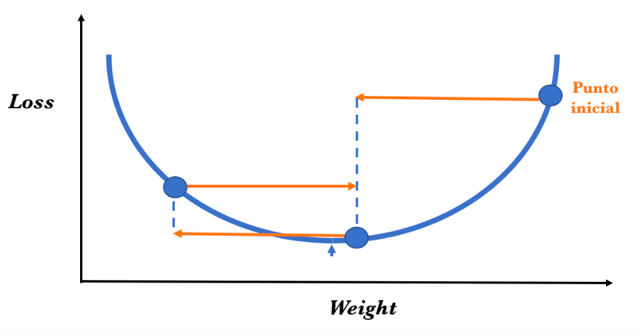

**decay(Learning rate decay):**  float >= 0. Se usa para disminuir el learning rate a medida que van pasando epochs para permitir que el aprendizaje avance más rápido al principio con learning rates más grandes. A medida que se avanza, se van haciendo ajustes cada vez más pequeños para facilitar que converja el proceso de entrenamiento al mínimo de la función loss.




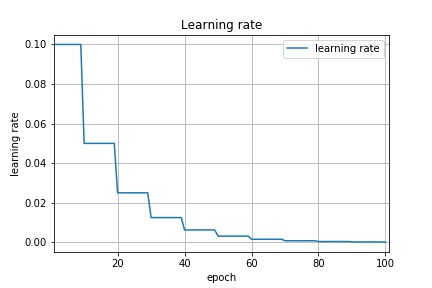

**momentum:** float entre 0 y 1. En problemas mas complejos donde se presenten minimos locales y el algortimo crea que es un minimo global, el optimizador puede quedarse atascado en un mínimo local, lo que lleva a resultados subóptimos. Este hiperparametro acelera el entrenamiento y pueden ayudar a converger el proceso de optimización.

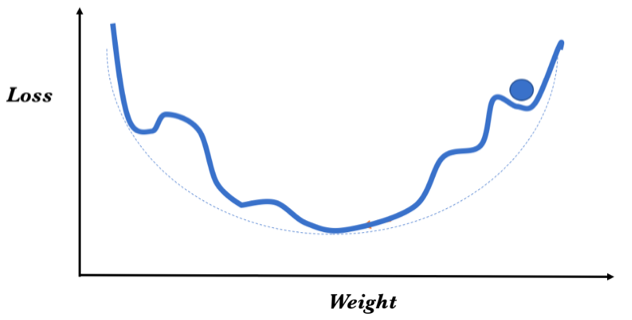

**nesterov:** (Nesterov momentum) boleano=false/true. Es una versión ligeramente diferente del momentum que básicamente ralentiza el gradiente cuando está ya cerca de la solución. 
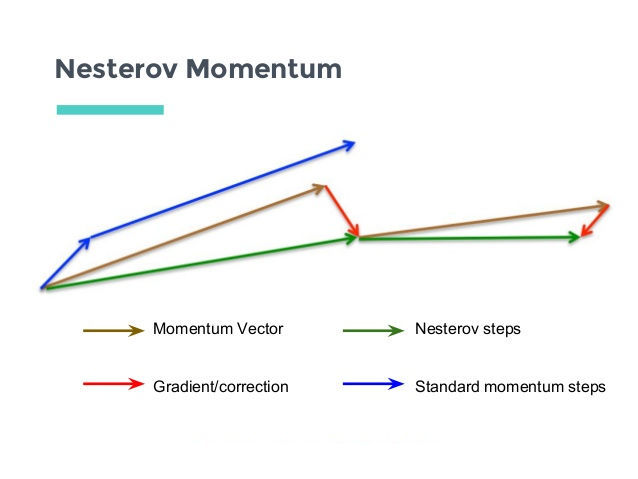

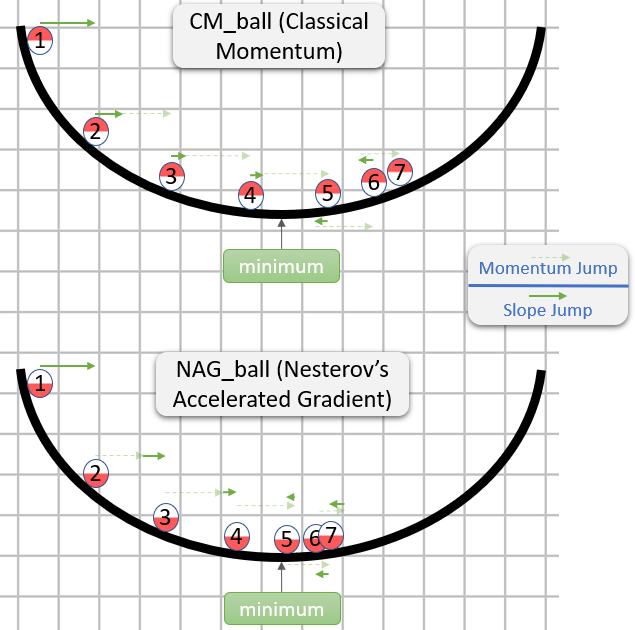

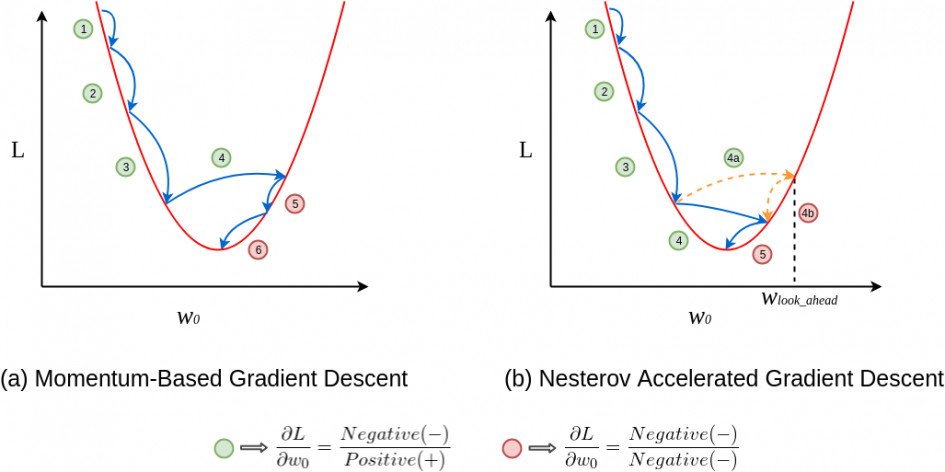

#### SGD(Stochastic gradient descent optimizer)
SGD permite usar los hiperparámetros *momentum, learning rate decay y Nesterov momentum*. A fin de disminuir el costo computacional del gradiente descendiente se desarrollo el SGD donde los parámetros se ajustan con el gradiente de la función de pérdida con cada ejemplo de los datos usados para entrenar el modelo. 

In [14]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

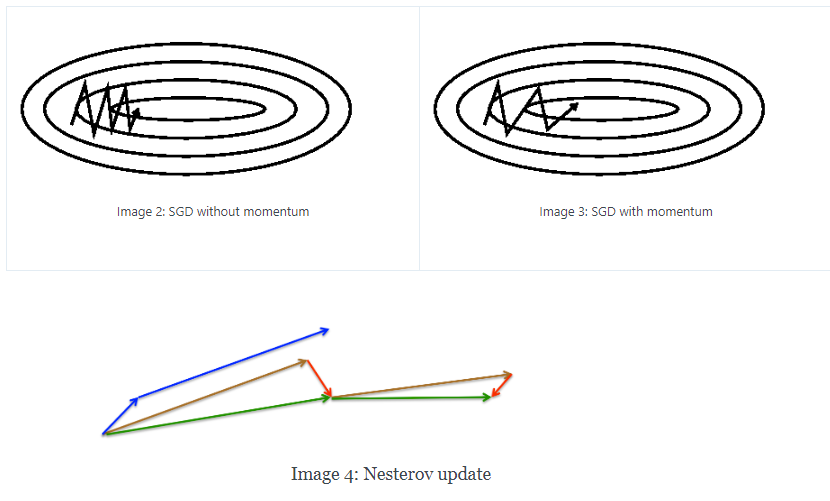

#### RMSprop

El optimizador RMSprop es similar al descenso del gradiente con momento. El RMSprop restringe las oscilaciones en la dirección vertical. Por tanto, se puede aumentar la tasa de aprendizaje y el algoritmo podría dar pasos más grandes en la dirección horizontal para que converja más rápido. 

La diferencia entre RMSprop y el descenso de gradiente está en cómo se calculan los gradientes. 
Se recomienda dejar los parámetros de este optimizador en sus valores predeterminados (excepto el lr).

**Argumentos**

- lr: float >= 0. Tasa de aprendizaje
- rho: float >= 0. Parametro de decaimiento (tipicamente 0.9)

In [17]:
rms = optimizers.RMSprop(lr=0.001, rho=0.9)

#### Adagrad

Adagrad es un optimizador con tasas de aprendizaje de parámetros específicos, que se adaptan en función de la frecuencia con la que se actualiza un parámetro durante el entrenamiento. Cuantas más actualizaciones reciba un parámetro, menor será la tasa de aprendizaje.

Se recomienda dejar los parametros de este optimizador en sus valores predeterminados.

**Argumentos**

lr: float >= 0. Tasa de aprendizaje

In [21]:
adagrad = optimizers.Adagrad(lr=0.01)

#### Adadelta

Es una extensión más sólida de Adagrad que adapta las tasas de aprendizaje en función de las actualizaciones de gradiente, en esta version se puede establecer la tasa de aprendizaje inicial y el factor de decaimiento.

Se recomienda dejar los parámetros de este optimizador en sus valores predeterminados.

**Argumentos**

- lr: float >= 0. Tasa de aprendizaje
- rho: float >= 0. Parametro de decaimiento (tipicamente 0.9)

In [22]:
adadelta = optimizers.Adadelta(lr=1.0, rho=0.95)

#### Adam

Adam combina las ventajas de otras dos extensiones de descenso de gradiente estocástico. Específicamente:

- Algoritmo de gradiente adaptativo (AdaGrad): mantiene una tasa de aprendizaje por parámetro que mejora el rendimiento en problemas con gradientes dispersos
- Propagación media cuadrática (RMSProp): también mantiene tasas de aprendizaje por parámetro que se adaptan según el promedio de las magnitudes recientes de los gradientes para el peso (funciona bien en problemas lienales y ruidosos).

**Argumentos**

- lr: float > = 0. Tasa de aprendizaje.
- beta_1: float, 0 <beta <1. Generalmente cercano a 1.
- beta_2: float, 0 <beta <1. Generalmente cercano a 1.
- amsgrad: booleano.

In [23]:
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

#### Adamax

Es una variante de Adam basada en la norma del infinito ( Máximo de los elementos en valor absoluto ).}

**Argumentos**

- lr: float >= 0. Learning rate.
- beta_1: float, 0 < beta < 1. Generally close to 1.
- beta_2: float, 0 < beta < 1. Generally close to 1.

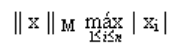

In [24]:
adamax = optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999)

#### Nadam (optimizador Nesterov Adam)

Al igual que Adam es esencialmente RMSprop con momentum, Nadam es RMSprop con momentum de Nesterov.

Se recomienda dejar los parámetros de este optimizador en sus valores predeterminados.

**Argumentos**

- lr: float> = 0. Tasa de aprendizaje.
- beta_1: float, 0 <beta <1. Generalmente cercano a 1.
- beta_2: float, 0 <beta <1. Generalmente cercano a 1

#### Comparación Métodos de optimización

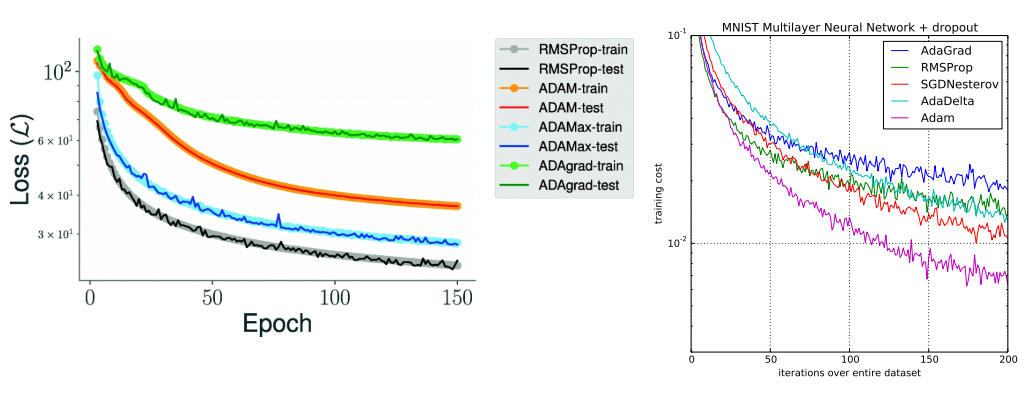

### Funciones de perdida en Keras

las funciones de pérdida se utilizan para evaluar el grado de error entre salidas calculadas y las salidas deseadas de los datos de entrenamiento y da un valor escalar que se intenta minimizar durante el entrenaniemto del modelo. Cuanto menor es la pérdida, más cerca están las predicciones de las etiquetas verdaderas.

**Mean square error (error cuadratico medio) L2 loss**
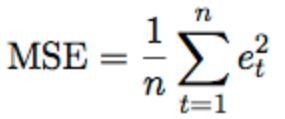

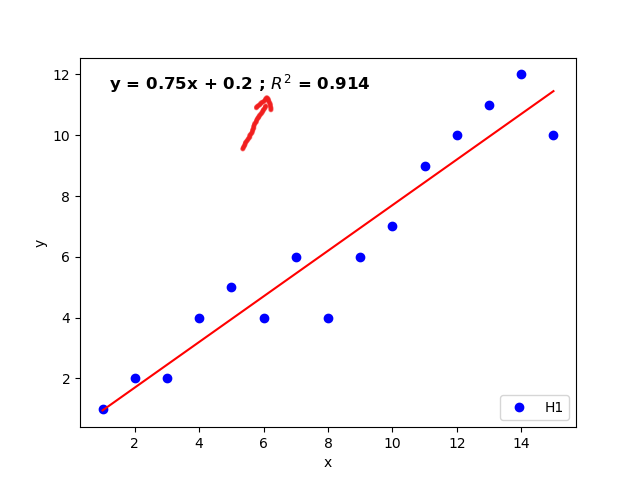

In [ ]:
from keras import losses
MSE = losses.mean_squared_error(y_true, y_pred)

**mean absolute error (error absoluto medio) L1 loss**

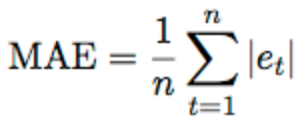

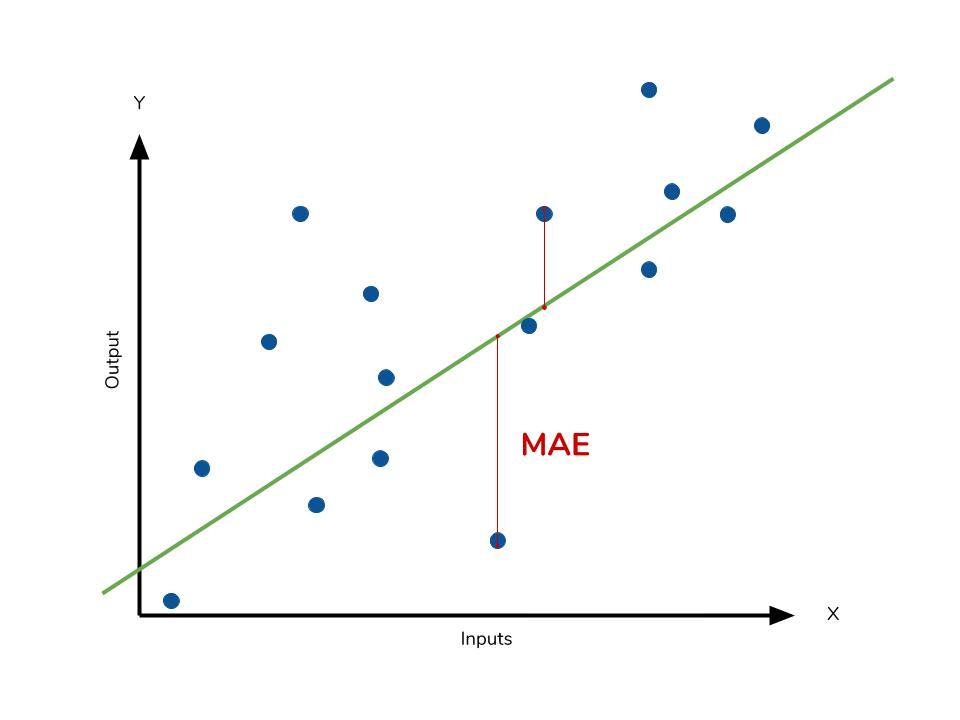

In [ ]:
MAE = losses.mean_absolute_error(y_true, y_pred)

**Mean absolute percentage error (Error porcentual absoluto medio)**
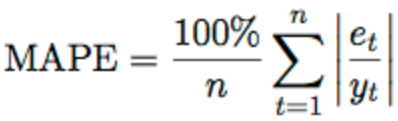

In [ ]:
MAPE = losses.mean_absolute_percentage_error(y_true, y_pred)

**Mean squared logarithmic error (Error logarítmico cuadratico medio)**
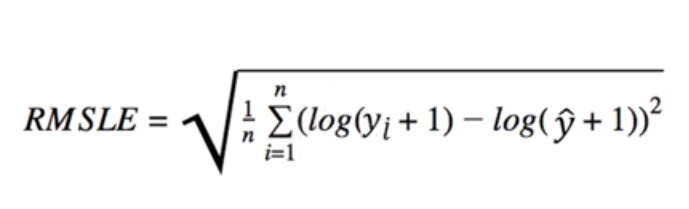

In [ ]:
RMSLE = losses.mean_squared_logarithmic_error(y_true, y_pred)

**Squared hinge (bisagra cuadratica)**

Es una función de pérdida utilizada para problemas de clasificación binaria de "margen máximo".
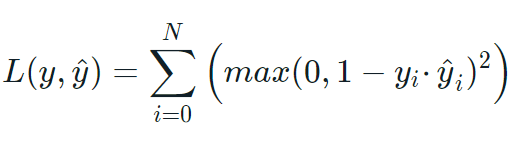

Esta funcion es:
- 0: cuando ŷ≥ 1
- aumentan cuadráticamente con el error: cuando ŷ <1

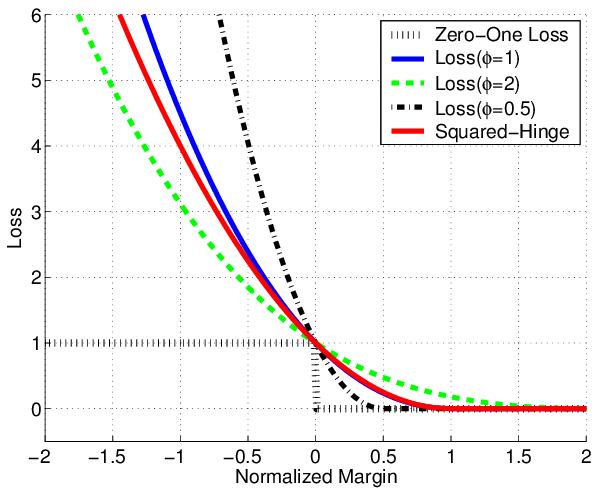

In [ ]:
Shinge = losses.squared_hinge(y_true, y_pred)

**Hinge (bisagra)**

Para cada muestra, la variable objetivo t es +1 o -1.

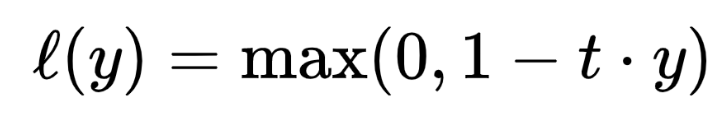

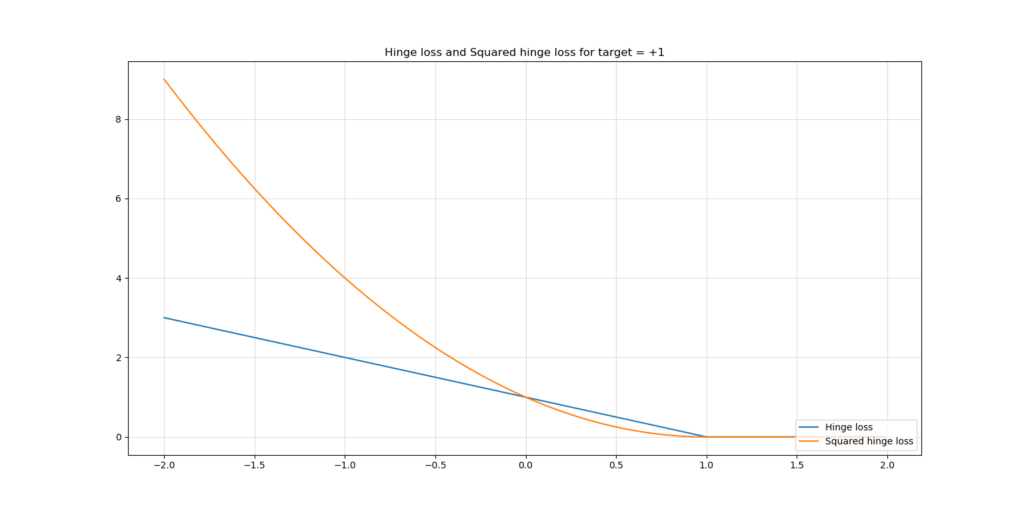

In [ ]:
Hinge = losses.categorical_hinge(y_true, y_pred)

C_hinge = losses.categorical_hinge(y_true, y_pred) #bisagra categorica (multiclass hinge)

**Logcosh (Logaritmo del coseno hiperbólico del error de predicción)**

Funciona principalmente como MSE, pero no se verá tan fuertemente afectado por la predicción ocasional extremadamente incorrecta.
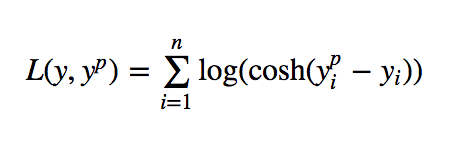

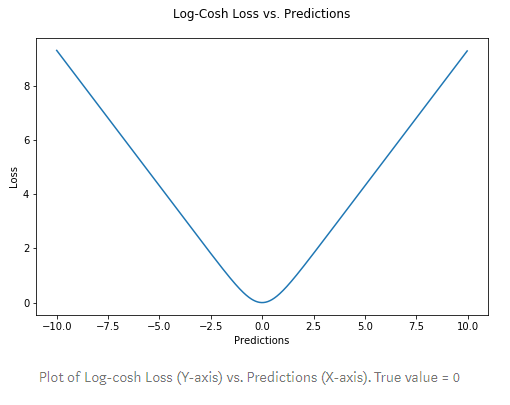

In [ ]:
logcosh = losses.logcosh(y_true, y_pred)

**Huber_loss**

Es menos sensible a los valores atípicos en los datos que MSE. Es básicamente un error absoluto, que se vuelve cuadrático cuando el error es pequeño. Lo pequeño que debe ser ese error para hacerlo cuadrático depende de un hiperparámetro (delta) que puede ajustarse. 

Es más robusto para los valores atípicos que MSE pero el inconveniente es que se podría necesitar entrenar el delta del hiperparámetro, que es un proceso iterativo.

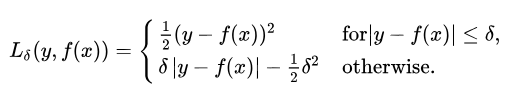

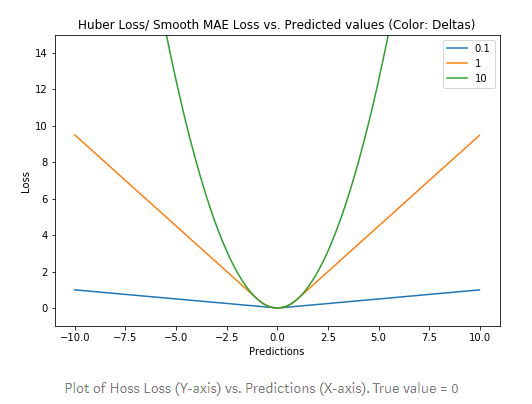

In [ ]:
Huber = losses.huber_loss(y_true, y_pred, delta=1.0)

**Categorical crossentropy (entropía cruzada categórica)**

Se usa en problemas de clasificación donde solo un resultado puede ser correcto.

Se compara la distribución de las predicciones con la distribución verdadera, donde la probabilidad de la clase verdadera se establece en 1 y para las otras clases en 0. con la entropía cruzada categórica aplicamos una función de activación categórica (como Softmax) que genera una distribución de probabilidad multiclase.


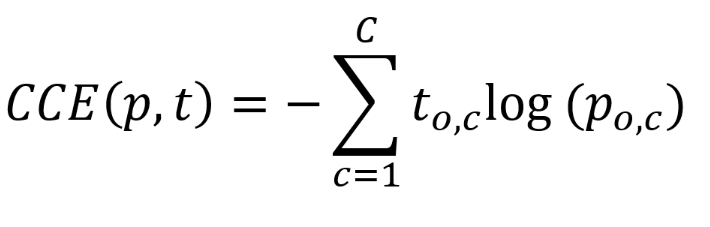

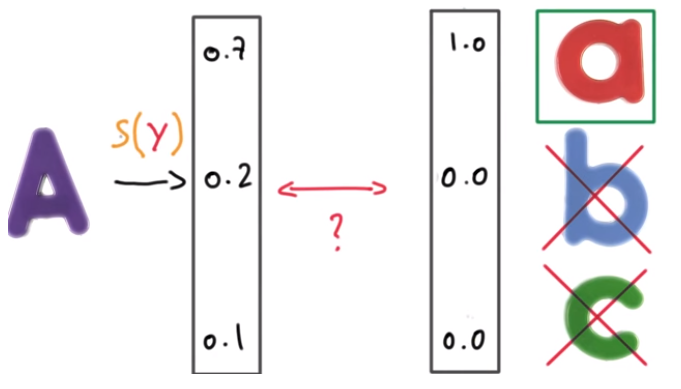

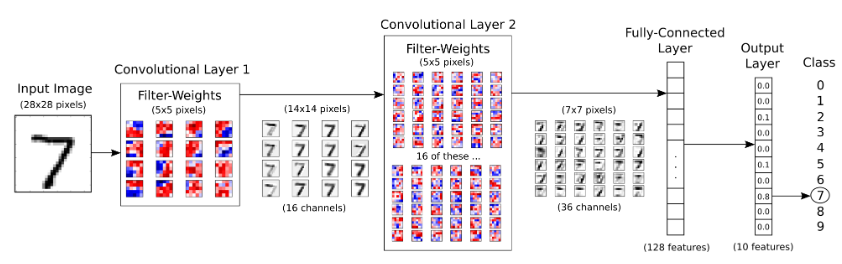

In [ ]:
CCE = losses.categorical_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0)

**Sparse categorical crossentropy (entropía cruzada categorica dispersa)**

Se usa cuando las clases son mutuamente excluyentes, es decir, no le importan en absoluto otras predicciones lo suficientemente cercanas.

Dispersa significa que usa todas las clases posibles, pero algunas de ellas. Esto es útil cuando se tiene muchas clases, entonces básicamente selecciona algunas de esas clases y aplica la entropía cruzada categórica.

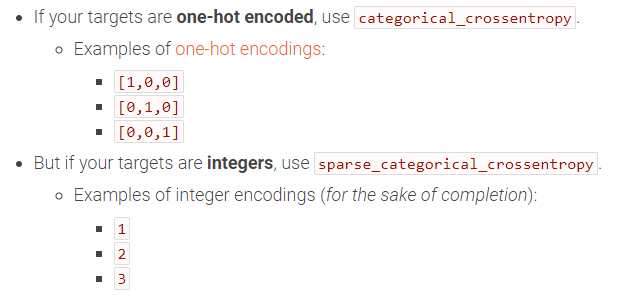

In [ ]:
SCC = losses.sparse_categorical_crossentropy(y_true, y_pred, from_logits=False, axis=-1)

**Binary crossentropy (entropía cruzada binaria)**

Se utiliza en las decisiones de sí/no, se usa en problemas de etiquetas múltiples. La entropía cruzada binaria mide qué tan lejos del valor verdadero (que es 0 o 1) la predicción es para cada una de las clases y luego promedia estos errores de clase para obtener la pérdida final.
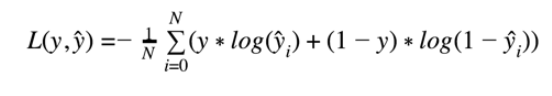

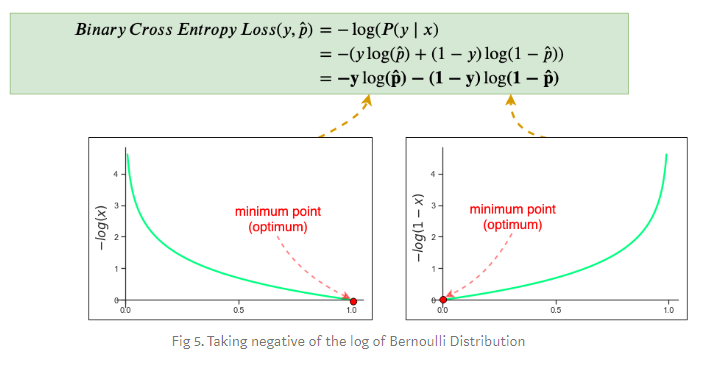

**Hay tres tipos de tareas de clasificación:**

Clasificación binaria: dos clases exclusivas.
Clasificación multi-clase: más de dos clases exclusivas.
Clasificación multi-etiqueta: solo clases no exclusivas

Luego:

- En el caso de (1), debe usar la entropía cruzada binaria.
- En el caso de (2), debe usar entropía cruzada categórica.
- En el caso de (3), debe usar la entropía cruzada binaria.


In [ ]:
BC = losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0)

**Poisson**

La regresión de Poisson es una forma de modelo lineal generalizado de análisis de regresión utilizado para modelar datos de conteo. Un modelo de regresión de Poisson a veces se conoce como un modelo log-lineal, especialmente cuando se usa para modelar tablas de contingencia.
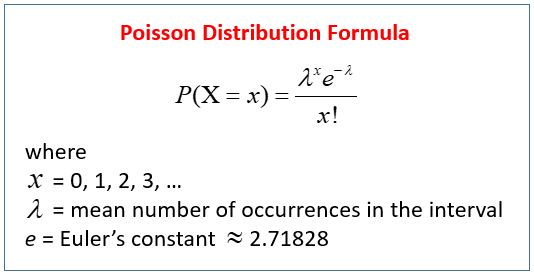

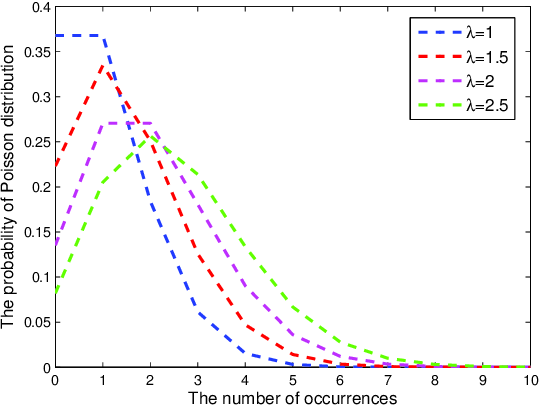

**Cosine proximity (Similitud coseno)**

Es una medida de la similitud existente entre dos vectores en un espacio con el que se evalúa el valor del coseno del ángulo comprendido entre ellos. 

- Proporciona un valor igual a 1 si el ángulo comprendido es cero
- Cualquier ángulo existente entre los vectores, el coseno arrojaría un valor inferior a 1. 
- Si los vectores apuntasen en sentido contrario su valor sería -1. 
De esta forma, el valor de esta métrica se encuentra en [-1,1].

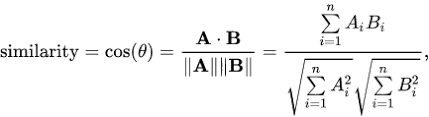

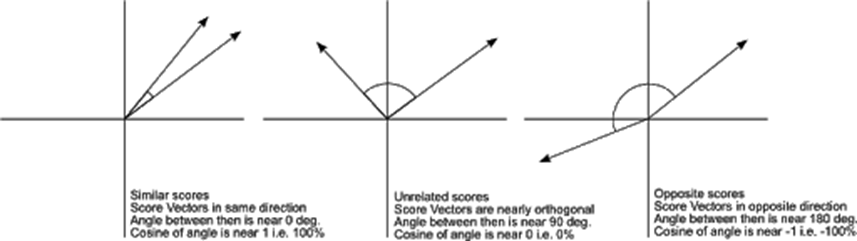

In [ ]:
CP = losses.cosine_proximity(y_true, y_pred, axis=-1)

### Funciones de activación

La función de activación se encarga de devolver una salida a partir de un valor de entrada, normalmente el conjunto de valores de salida en un rango determinado como (0,1) o (-1,1). Se buscan funciones que las derivadas sean simples, para minimizar con ello el coste computacional

In [27]:
from keras.layers import Activation, Dense

model.add(Dense(64))
model.add(Activation('tanh'))

model.add(Dense(64, activation='tanh'))

**Linear**

**Argumentos**

x: Tensor de entrada

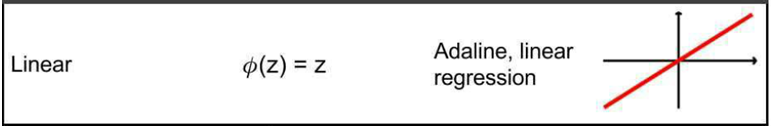

In [ ]:
L = activations.linear(x)

**Sigmoid**

**Argumentos**

x: Tensor de entrada

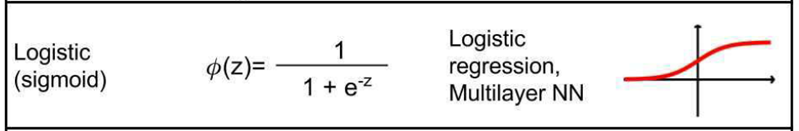

In [ ]:
S = activations.sigmoid(x)

**Tanh**

Función de activación de tangente hiperbólica.

**Argumentos**

x: Tensor de entrada



**ReLU (Rectified Linear Unit)**

Con valores predeterminados, devuelve el elemento max (x, 0).

**Argumentos**

- x: tensor de entrada.
- alfa: float. Pendiente de la parte negativa. Por defecto es cero.
- max_value: float. Umbral de saturación
- umbral: flat. Valor para la activación por umbral.

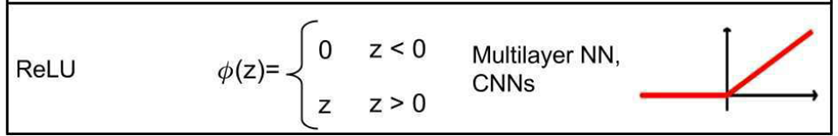

In [ ]:
ReLU = activations.relu(x, alpha=0.0, max_value=None, threshold=0.0)

**ELU (exponential linear unit)**

**Argumentos**

- x: tensor de entrada.
- alpha: escalar, pendiente de la sección negativa.

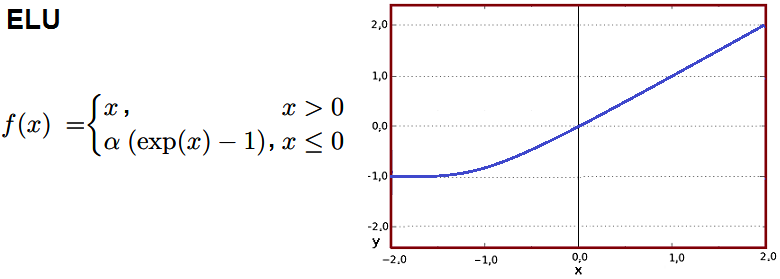

In [ ]:
ELU = activations.elu(x, alpha=1.0)

**Softmax**

La función Softmax comprime los valores a valores positivos entre 0.0 y 1.0. Son típicamente ubicadas en las capas de salida de las redes utilizadas para la clasificación, las neuronas Softmax permiten la predicción de salidas a ciertas clases.

**Argumentos**

- x: tensor de entrada.
- axis: número entero, eje a lo largo del cual se aplica la normalización softmax.


In [ ]:
S = activations.softmax(x, axis=-1)

**SELU (Scaled Exponential Linear Unit)**

SELU es igual a: *scale * elu (x, alpha)*, donde *alpha y scale* son constantes predefinidas. Los valores de alfa y escala se eligen de modo que la media y la varianza de las entradas se conserven entre dos capas consecutivas siempre que los pesos se inicialicen correctamente 

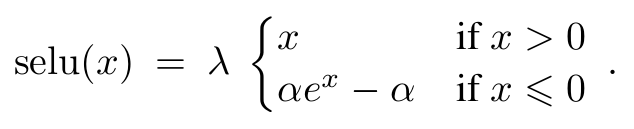

In [ ]:
SELU = activations.selu(x)

### Métricas

Una métrica es una función que se utiliza para juzgar el rendimiento de un modelo. Las funciones de métricas se deben suministrar en el parámetro *metrics* cuando se compila un modelo.

Una función métrica es similar a una función de pérdida, excepto que los resultados de la evaluación de una métrica no se utilizan al entrenar el modelo. 

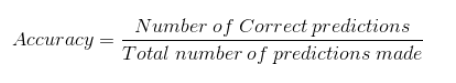

In [ ]:
from keras import metrics

model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['accuracy'])

model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=[metrics.accuracy])

**Matriz de consfusión**

Se obtiene una matriz como salida y describe el rendimiento completo del modelo.

Supongamos que se tiene un problema de clasificación binaria. Al probar el modelo en 165 muestras, se obtiene:
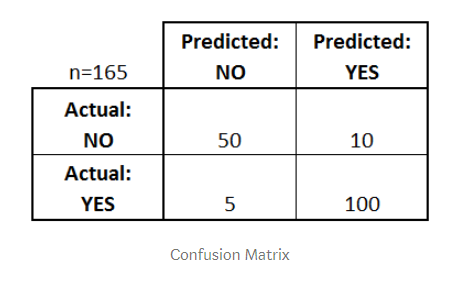

La precisión de la matriz se puede calcular tomando el promedio de los valores que se encuentran en la diagonal principal, es decir:

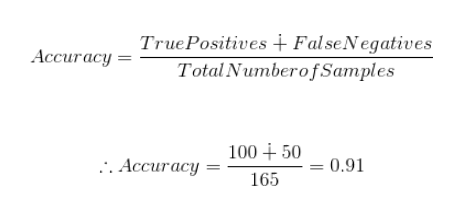

**Keras Regression Metrics**

- Mean Squared Error: mean_squared_error, MSE or mse
- Mean Absolute Error: mean_absolute_error, MAE, mae
- Mean Absolute Percentage Error: mean_absolute_percentage_error, MAPE, mape
- Cosine Proximity: cosine_proximity, cosine

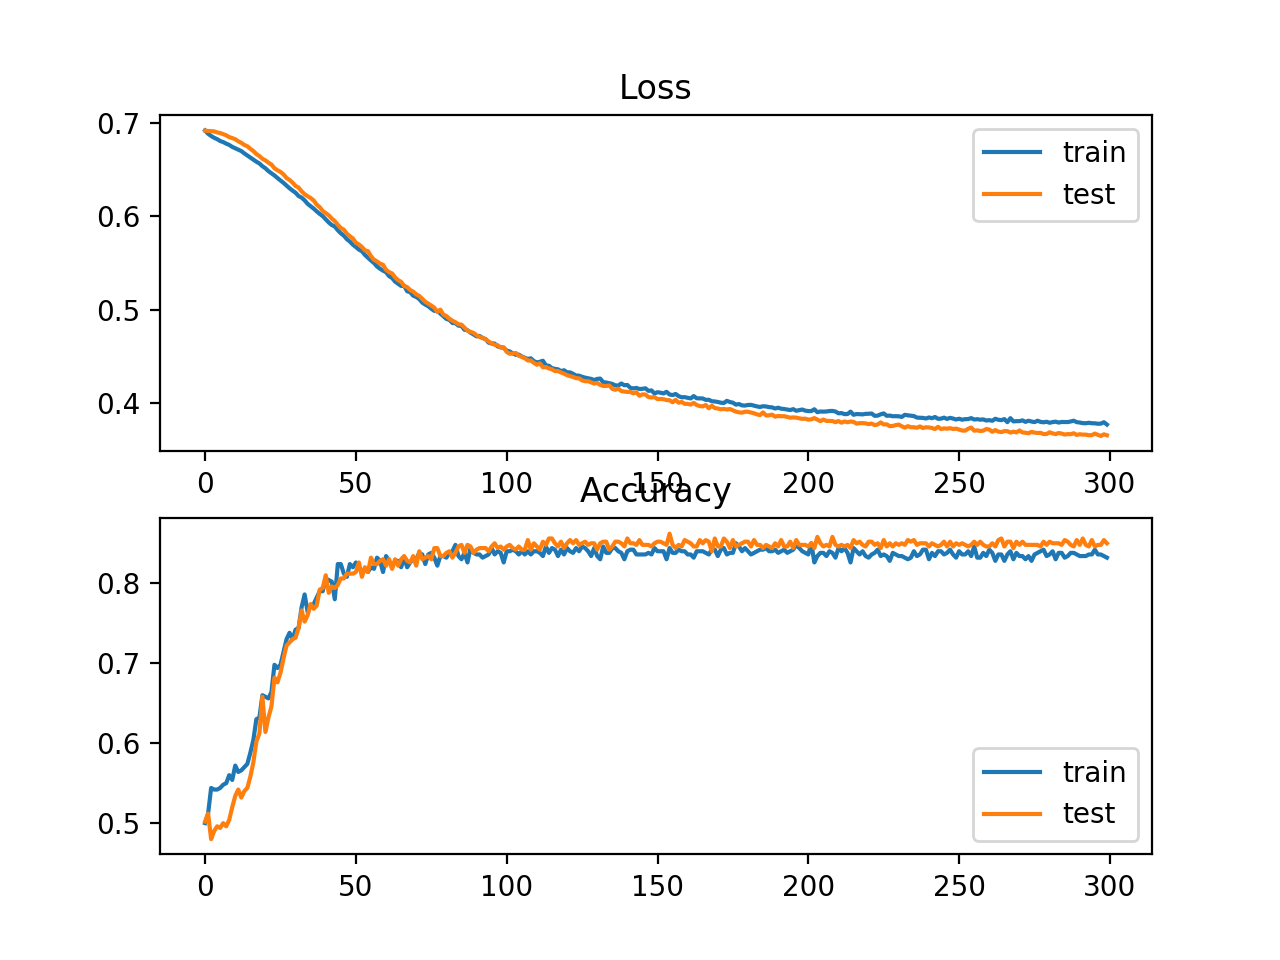

## Entrenamiento de la red (Fit)

Los modelos Keras están capacitados en matrices Numpy de datos de entrada y etiquetas. Para entrenar un modelo, normalmente utilizará la función *fit*. 

In [ ]:
# For a single-input model with 2 classes (binary classification):

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Generate dummy data
import numpy as np
data = np.random.random((1000, 100)) # datos aleatorios de 1000x100
labels = np.random.randint(2, size=(1000, 1)) # datos aleatorios de 1000x1 hasta max 2

# Train the model, iterating on the data in batches of 32 samples
model.fit(data, labels, epochs=10, batch_size=32)

In [ ]:
# For a single-input model with 10 classes (categorical classification):

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Generate dummy data
import numpy as np
data = np.random.random((1000, 100))
labels = np.random.randint(10, size=(1000, 1))

# Convert labels to categorical one-hot encoding
one_hot_labels = keras.utils.to_categorical(labels, num_classes=10)

# Train the model, iterating on the data in batches of 32 samples
model.fit(data, one_hot_labels, epochs=10, batch_size=32)

Donde:

- x: datos de entrada. Podría ser: Una matriz Numpy (o similar a una matriz), o una lista de matrices (en caso de que el modelo tenga múltiples entradas).
- y: datos de destino. Podría ser una matriz de Numpy, tensor (es) nativo del marco, una lista de matrices Numpy (si el modelo tiene múltiples salidas).
- batch_size: entero o ninguno. Número de muestras por actualización de gradiente. Si no se especifica, el tamaño de lote será por defecto 32. 
- épocas: entero. Número de épocas para entrenar al modelo. Una época es una iteración sobre todos los datos x e y proporcionados.

### Ejemplo de red neuronal en Keras, caso: Multilayer Perceptron (MLP) for multi-class softmax classification:

Incluimos las librerias *Sequential* para importar el modelo de la red, *Dense, Dropout y Activation* para importar las capas de la red y *SGD* para importar el optmizador

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

Generamos los datos aleatorios con la biblioteca *numpy*, *to_categorical* ingresa la cantidad de clases y el tamaño del lote

In [10]:
# Generate dummy data
import numpy as np
x_train = np.random.random((1000, 20))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
x_test = np.random.random((100, 20))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)

In [18]:
y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
print(np.random.randint(10, size=(100, 1)))
print(y_test.shape)
print(y_test)

[[9]
 [0]
 [3]
 [2]
 [7]
 [8]
 [1]
 [9]
 [5]
 [2]
 [1]
 [3]
 [4]
 [9]
 [5]
 [4]
 [8]
 [0]
 [3]
 [4]
 [6]
 [4]
 [9]
 [6]
 [8]
 [7]
 [8]
 [1]
 [8]
 [0]
 [6]
 [8]
 [3]
 [7]
 [5]
 [2]
 [2]
 [8]
 [9]
 [0]
 [5]
 [8]
 [1]
 [8]
 [2]
 [9]
 [8]
 [6]
 [3]
 [0]
 [7]
 [8]
 [2]
 [0]
 [0]
 [6]
 [9]
 [5]
 [0]
 [0]
 [8]
 [3]
 [6]
 [0]
 [0]
 [2]
 [0]
 [9]
 [2]
 [8]
 [8]
 [3]
 [0]
 [3]
 [4]
 [6]
 [9]
 [0]
 [4]
 [3]
 [8]
 [3]
 [1]
 [3]
 [0]
 [1]
 [9]
 [1]
 [3]
 [7]
 [1]
 [1]
 [7]
 [9]
 [9]
 [0]
 [7]
 [6]
 [2]
 [1]]
(100, 10)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0

Inciamos el modelo de la red con *Sequential()*, agregamos las capas con *add* y usando *Dropout* desactivamos un numero de forma aleatoria (0.5=la mitad de neuronas activas)

In [19]:
model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(64, activation='relu', input_dim=20))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


usamos el optmizador SGD (Stochastic gradient descent optimizer) y usando la funcion *copile()* definimos la funcion de perdida, el optimizador y la métrica

In [20]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

Entrenamos la red con *fit* y definimos el numero de epocas, el tamaño del lote y luego con la funcion *evaluate()* se valida la red neuronal con los datos de prueba y usando el mismo tamaño de lote

In [30]:
history = model.fit(x_train, y_train,
          epochs=50,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)

Epoch 1/50
1000/1000 [==============================] - 0s 47us/step - loss: 2.2664 - accuracy: 0.1410
Epoch 2/50
1000/1000 [==============================] - 0s 42us/step - loss: 2.2600 - accuracy: 0.1450
Epoch 3/50
1000/1000 [==============================] - 0s 43us/step - loss: 2.2570 - accuracy: 0.1530
Epoch 4/50
1000/1000 [==============================] - 0s 43us/step - loss: 2.2601 - accuracy: 0.1470
Epoch 5/50
1000/1000 [==============================] - 0s 44us/step - loss: 2.2550 - accuracy: 0.1460
Epoch 6/50
1000/1000 [==============================] - 0s 45us/step - loss: 2.2573 - accuracy: 0.1650
Epoch 7/50
1000/1000 [==============================] - 0s 51us/step - loss: 2.2441 - accuracy: 0.1660
Epoch 8/50
1000/1000 [==============================] - 0s 43us/step - loss: 2.2595 - accuracy: 0.1720
Epoch 9/50
1000/1000 [==============================] - 0s 51us/step - loss: 2.2620 - accuracy: 0.1320
Epoch 10/50
1000/1000 [==============================] - 0s 49us/step - l

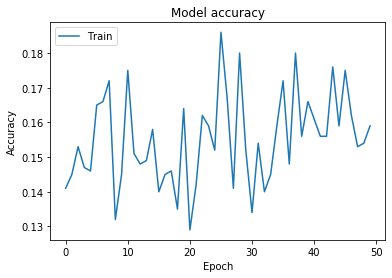

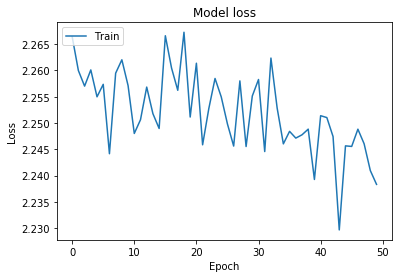

In [31]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Para finalizar
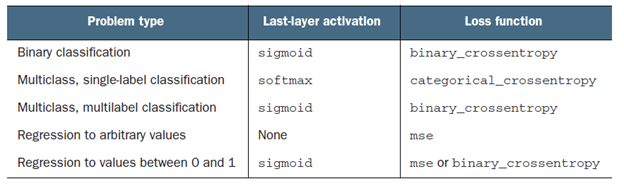

Caso 1:
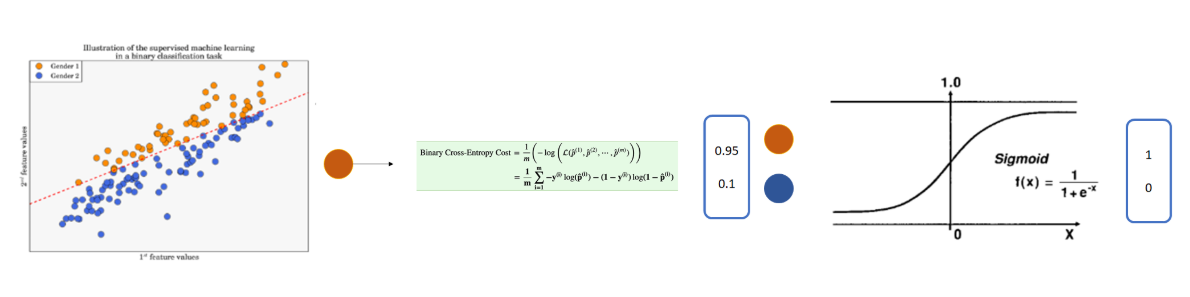

Caso 2:
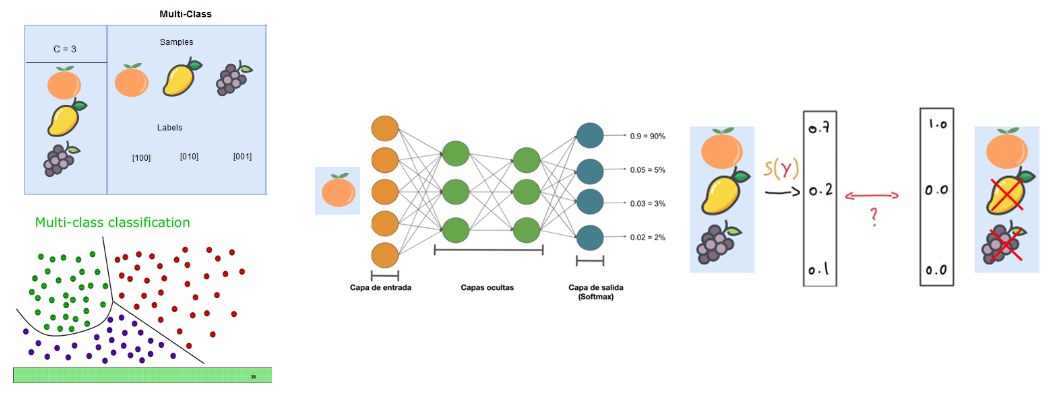

Caso 3:
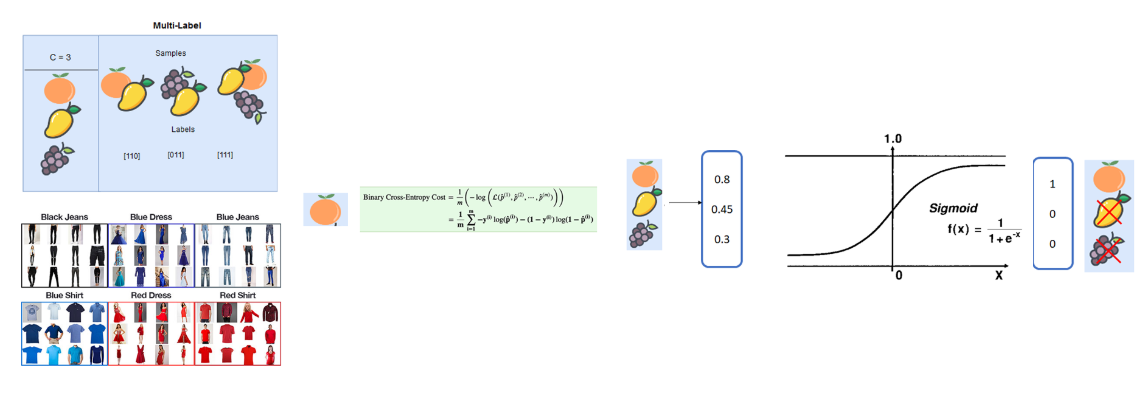

Caso 4:
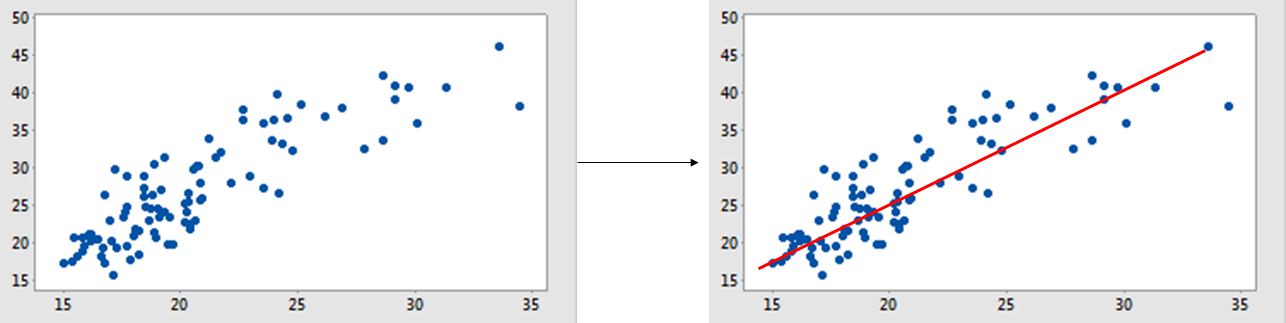

Caso 5:
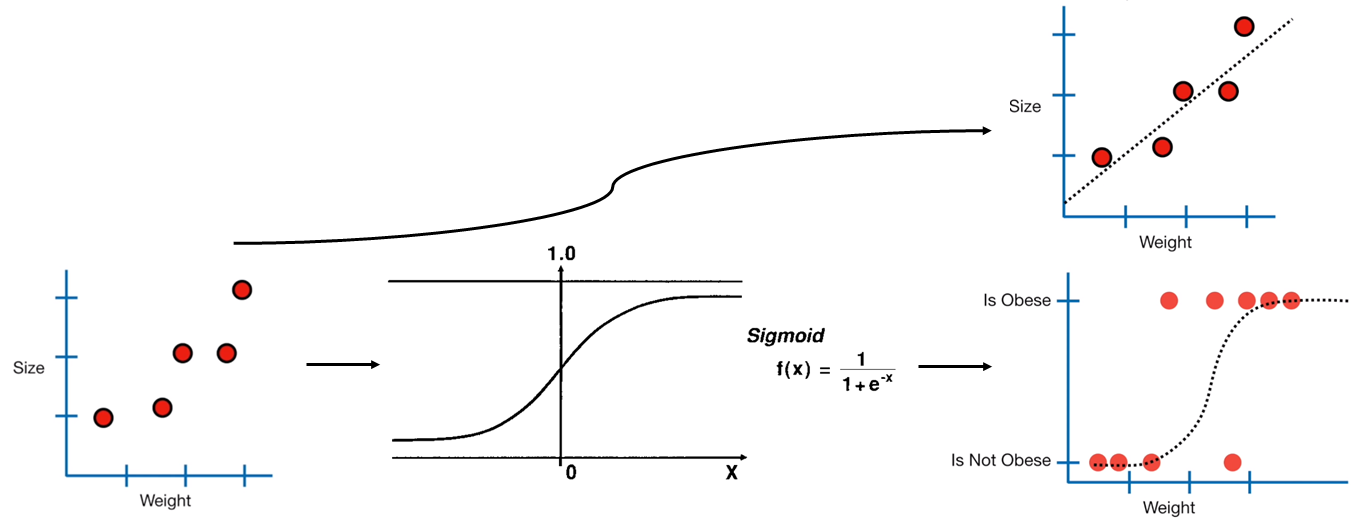